### CASE - AIR PASSENGER 

In [150]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

import pmdarima as pm

In [151]:
df= pd.read_csv(r"C:\Users\Shilpi\OneDrive\Desktop\FINALL\FORECASTING\datasets\airline_passenger_traffic.csv",header = None)

In [152]:
df.shape

(144, 2)

In [153]:
df.head()

0      1
0  1949-01 112.00
1  1949-02 118.00
2  1949-03 132.00
3  1949-04 129.00
4  1949-05 121.00

In [154]:
# Name the columns
df.columns = ['Month','No_of_passengers']


In [155]:
# Represent Month column in date fromat in the order, Year and the month
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
# set the Month column as index of the dataset
df = df.set_index('Month')
df.head()


No_of_passengers
Month                       
1949-01-01            112.00
1949-02-01            118.00
1949-03-01            132.00
1949-04-01            129.00
1949-05-01            121.00

In [156]:
df.shape


(144, 1)

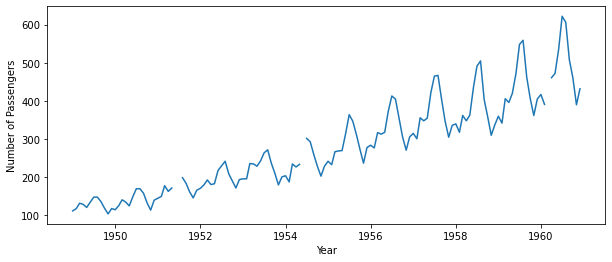

In [157]:
plt.figure( figsize=(10,4))
plt.xlabel( "Year" )
plt.ylabel( "Number of Passengers" )
plt.plot( df['No_of_passengers'] );


In [158]:

# creating series True or False for NaN data and present data respectively.
nul_data = pd.isnull(df['No_of_passengers'])
# print only the data, No of passengers = NaN
df[nul_data]

No_of_passengers
Month                       
1951-06-01               NaN
1951-07-01               NaN
1954-06-01               NaN
1960-03-01               NaN

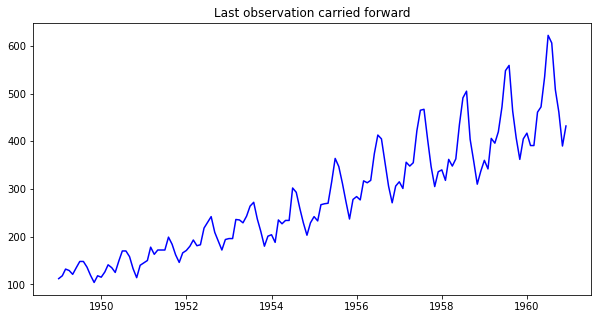

In [159]:
# declare the size of the plot
plt.rcParams['figure.figsize']=(10,5)
# fill the missing data with LOCF
df['Passengers_nocf']= df['No_of_passengers'].fillna(method ='ffill')
# pass the data and declared the colour of your curve, i.e., blue
plt.plot(df['Passengers_nocf'], color='blue')
# add tittle to the plot
plt.title('Last observation carried forward')
# print the plot
plt.show()


In [160]:
#Fill mean/median 
#declare the size of the plot
#plt.rcParams['figure.figsize']=(10,5)
# fill the missing data using the mean of the present observations
#df = df.assign(FillMean=df.No_of_passengers.fillna(df.No_of_passengers.median()))
# pass the data and declared the colour of your curve, i.e., blue
#plt.plot(df, color='blue')
# add tittle to the plot
#plt.title('Mean Imputation')
# print the plot
#plt.show()

In [161]:
df.rename( columns = { 'Passengers_nocf': 'Passengers'}, inplace = True)

### Forecasting Using Moving average

In [162]:
#df['mavg_12'] = df['Passengers'].rolling( window = 12 ).mean()
df['mavg_12'] = df['Passengers'].rolling( window = 12 ).mean().shift(1)


In [163]:
df[13:19]

No_of_passengers  Passengers  mavg_12
Month                                            
1950-02-01            126.00      126.00   126.92
1950-03-01            141.00      141.00   127.58
1950-04-01            135.00      135.00   128.33
1950-05-01            125.00      125.00   128.83
1950-06-01            149.00      149.00   129.17
1950-07-01            170.00      170.00   130.33

In [164]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df[['Passengers', 'mavg_12']][0:]

Passengers  mavg_12
Month                          
1949-01-01      112.00      NaN
1949-02-01      118.00      NaN
1949-03-01      132.00      NaN
1949-04-01      129.00      NaN
1949-05-01      121.00      NaN
...                ...      ...
1960-08-01      606.00   457.08
1960-09-01      508.00   461.00
1960-10-01      461.00   464.75
1960-11-01      390.00   469.25
1960-12-01      432.00   471.58

[144 rows x 2 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


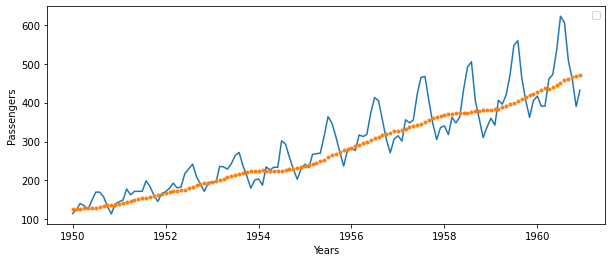

In [165]:
plt.figure( figsize=(10,4))
plt.xlabel( "Years" )
plt.ylabel( "Passengers" )
plt.plot( df['Passengers'][12:] );
plt.plot( df['mavg_12'][12:], '.' );
plt.legend();

### Calculate Forecasting Accuracy

In [166]:
import numpy as np
def get_mape(actual, predicted):
 y_true, y_pred = np.array(actual), np.array(predicted)
 return np.round( np.mean(np.abs((actual - predicted) / actual)) * 100, 2 )

In [167]:
get_mape(df['Passengers'][120:].values,df['mavg_12'][120:].values)

11.7

In [168]:
from sklearn.metrics import mean_squared_error
mse= np.sqrt(mean_squared_error(df['Passengers'][120:].values,df['mavg_12'][120:].values))
mse
#84.5347133797927

75.30231124410261

In [169]:
rmse= np.sqrt(mse)

In [170]:
rmse
#9.194276120488915

8.677690432603747

### Exponential Smoothing

In [171]:
df['ewm'] = df['Passengers'].ewm( alpha = 0.99).mean()

In [172]:
pd.options.display.float_format = '{:.2f}'.format

In [173]:
df[120:]


No_of_passengers  Passengers  mavg_12    ewm
Month                                                   
1959-01-01            360.00      360.00   381.00 359.77
1959-02-01            342.00      342.00   382.67 342.18
1959-03-01            406.00      406.00   384.67 405.36
1959-04-01            396.00      396.00   388.33 396.09
1959-05-01            420.00      420.00   392.33 419.76
1959-06-01            472.00      472.00   397.08 471.48
1959-07-01            548.00      548.00   400.17 547.23
1959-08-01            559.00      559.00   404.92 558.88
1959-09-01            463.00      463.00   409.42 463.96
1959-10-01            407.00      407.00   414.33 407.57
1959-11-01            362.00      362.00   418.33 362.46
1959-12-01            405.00      405.00   422.67 404.57
1960-01-01            417.00      417.00   428.33 416.88
1960-02-01            391.00      391.00   433.08 391.26
1960-03-01               NaN      391.00   437.17 391.00
1960-04-01            461.00      461.00   435.92 460.30
1960-05-01            472.00      472.00   441.33 471.88
1960-06-01            535.00      535.00   445.67 534.37
1960-07-01            622.00      622.00   450.92 621.12
1960-08-01            606.00      606.00   457.08 606.15
1960-09-01            508.00      508.00   461.00 508.98
1960-10-01            461.00      461.00   464.75 461.48
1960-11-01            390.00      390.00   469.25 390.71
1960-12-01            432.00      432.00   471.58 431.59

In [174]:
### Calculate Mape and RMSE

In [175]:
import numpy as np
def get_mape(actual, predicted):
 y_true, y_pred = np.array(actual), np.array(predicted)
 return np.round( np.mean(np.abs((actual - predicted) / actual)) * 100, 2 )

In [176]:
get_mape(df['Passengers'][120:].values,
df['ewm'][120:].values)
#11.26

0.1

In [177]:
from sklearn.metrics import mean_squared_error
mse= np.sqrt(mean_squared_error(df['Passengers'][120:].values,df['ewm'][120:].values))
mse
#14.09779074789947

0.5289088961083253

In [178]:
rmse= np.sqrt(mse)
rmse
#3.754702484605068

0.7272612296199524

In [1]:
## changing alpha (hit and trial)

In [30]:
df['ewm1'] = df['Passengers'].ewm( alpha = 0.99 ).mean()

In [31]:
pd.options.display.float_format = '{:.2f}'.format

In [32]:
df[120:]

No_of_passengers  Passengers  mavg_12    ewm   ewm1
Month                                                          
1959-01-01            360.00      360.00   381.00 354.81 359.77
1959-02-01            342.00      342.00   382.67 344.56 342.18
1959-03-01            406.00      406.00   384.67 393.71 405.36
1959-04-01            396.00      396.00   388.33 395.54 396.09
1959-05-01            420.00      420.00   392.33 415.11 419.76
1959-06-01            472.00      472.00   397.08 460.62 471.48
1959-07-01            548.00      548.00   400.17 530.52 547.23
1959-08-01            559.00      559.00   404.92 553.30 558.88
1959-09-01            463.00      463.00   409.42 481.06 463.96
1959-10-01            407.00      407.00   414.33 421.81 407.57
1959-11-01            362.00      362.00   418.33 373.96 362.46
1959-12-01            405.00      405.00   422.67 398.79 404.57
1960-01-01            417.00      417.00   428.33 413.36 416.88
1960-02-01            391.00      391.00   433.08 395.47 391.26
1960-03-01               NaN      461.00   437.17 447.89 460.30
1960-04-01            461.00      461.00   441.75 458.38 460.99
1960-05-01            472.00      472.00   447.17 469.28 471.89
1960-06-01            535.00      535.00   451.50 521.86 534.37
1960-07-01            622.00      622.00   456.75 601.97 621.12
1960-08-01            606.00      606.00   462.92 605.19 606.15
1960-09-01            508.00      508.00   466.83 527.44 508.98
1960-10-01            461.00      461.00   470.58 474.29 461.48
1960-11-01            390.00      390.00   475.08 406.86 390.71
1960-12-01            432.00      432.00   477.42 426.97 431.59

In [33]:
from sklearn.metrics import mean_squared_error
mse1= np.sqrt(mean_squared_error(df['Passengers'][120:].values,df['ewm1'][120:].values))
mse1
#0.6899214975284024

0.5287040314681816

In [34]:
rmse1= np.sqrt(mse1)
rmse1
#0.8306151320126562

0.7271203693118365

C:\Users\Shilpi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


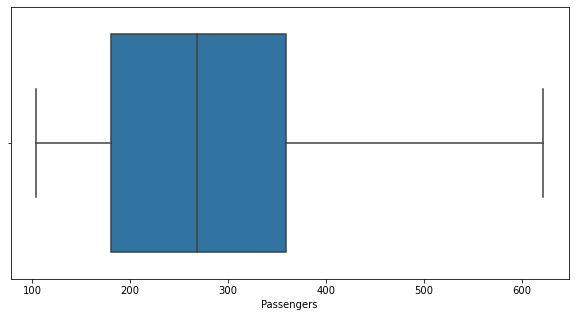

In [33]:
import seaborn as sn
box = sn.boxplot(df['Passengers'])


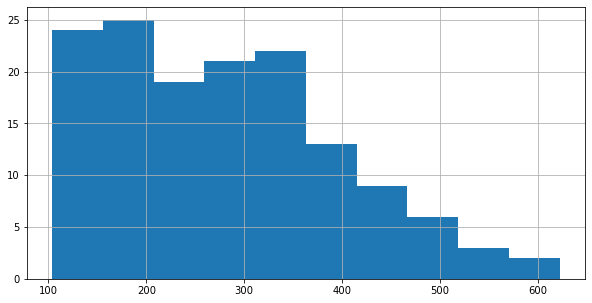

In [34]:

fig = df.Passengers.hist(figsize = (10,5))


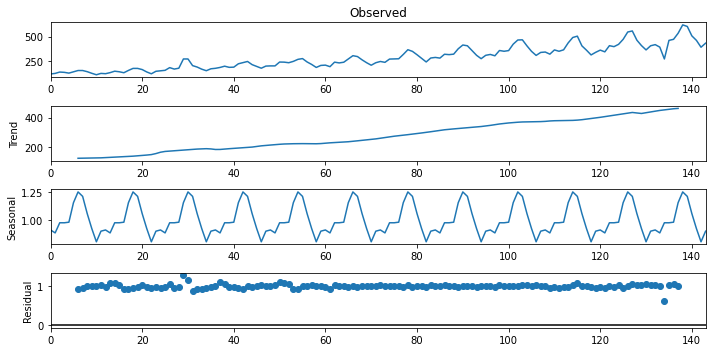

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts_decompse = seasonal_decompose( np.array(df['Passengers']), model='multiplicative', period = 12)
## Plotting the deocompsed time series components
ts_plot = ts_decompse.plot()


In [ ]:
### code for outlier
import seaborn as sn
box = sn.boxplot(df['total_sales'])

In [ ]:
#Function for removing outliers
def outliers(col):
    sorted(col)
    Q1,Q3= np.percentile(col,[25,75])
    IQR = Q3 - Q1
    LOWER_RANGE = Q1 - (1.5*IQR)
    UPPER_RANGE= Q3 + (1.5*IQR)
    return  LOWER_RANGE,UPPER_RANGE

In [ ]:
#Check the lower range and upper range for the variable with zscore
LOWER_RANGE,UPPER_RANGE=outliers(df['total_sales'])
print("lower range",LOWER_RANGE, "and upper range", UPPER_RANGE)
#Capping the outliers
df['total_sales']= np.where(df['total_sales']>UPPER_RANGE,UPPER_RANGE,df['total_sales'])
df['total_sales'] = np.where(df['total_sales']<LOWER_RANGE,LOWER_RANGE,df['total_sales'])

In [ ]:
sn.boxplot(x=df['total_sales'])